In [18]:
library(httr)
library(jsonlite)
library(tidyr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(ggthemes)
library(RColorBrewer)
library(scales)

In [2]:
#domain = 'https://api.carbonintensity.org.uk/generation'

#test_domain 
domain= 'https://api.carbonintensity.org.uk/generation/2019-01-01T00:00Z/2019-02-03T00:00Z'

In [3]:
response = GET(domain)
json_content = content(response, "text",encoding = "UTF-8")
data <- fromJSON(json_content)$data
data <- unnest(data, cols = generationmix)
data <- spread(data, key = fuel, value = perc)

data$from <- as.POSIXct(data$from, format = "%Y-%m-%dT%H:%MZ")
data$to <- as.POSIXct(data$to, format = "%Y-%m-%dT%H:%MZ")
data$from <- floor_date(data$from, unit = "day")
data$to <- floor_date(data$to, unit = "day")

data <- select(data, -from)
data <- rename(data, date = to)

data_generation <- data %>%
  group_by(date) %>%
  summarize(
    biomass = sum(biomass),
    coal = sum(coal),
    gas = sum(gas),
    hydro = sum(hydro),
    imports = sum(imports),
    nuclear = sum(nuclear),
    other = sum(other),
    solar = sum(solar),
    wind = sum(wind)
  )
data_generation

date,biomass,coal,gas,hydro,imports,nuclear,other,solar,wind
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-01-01,190.8,84.2,1782.3,109.1,370.9,1103.8,11.2,50.4,1097.3
2019-01-02,252.2,313.3,2556.9,115.7,362.8,809.4,8.9,34.4,346.4
2019-01-03,259.6,443.1,2712.4,98.7,322.9,724.1,7.8,18.7,212.7
2019-01-04,261.0,321.4,2709.0,70.1,313.4,755.4,7.9,40.7,321.1
2019-01-05,208.1,164.5,2696.6,94.8,383.1,833.0,9.3,8.7,401.9
2019-01-06,190.9,225.1,2697.0,100.8,417.1,859.9,9.3,19.3,280.6
2019-01-07,237.7,125.7,1770.1,71.5,281.0,882.1,6.0,15.0,1410.9
2019-01-08,161.6,121.9,1784.3,100.8,337.8,924.3,6.3,72.6,1290.4
2019-01-09,237.4,334.4,2394.7,65.0,338.0,829.3,5.4,66.3,529.5


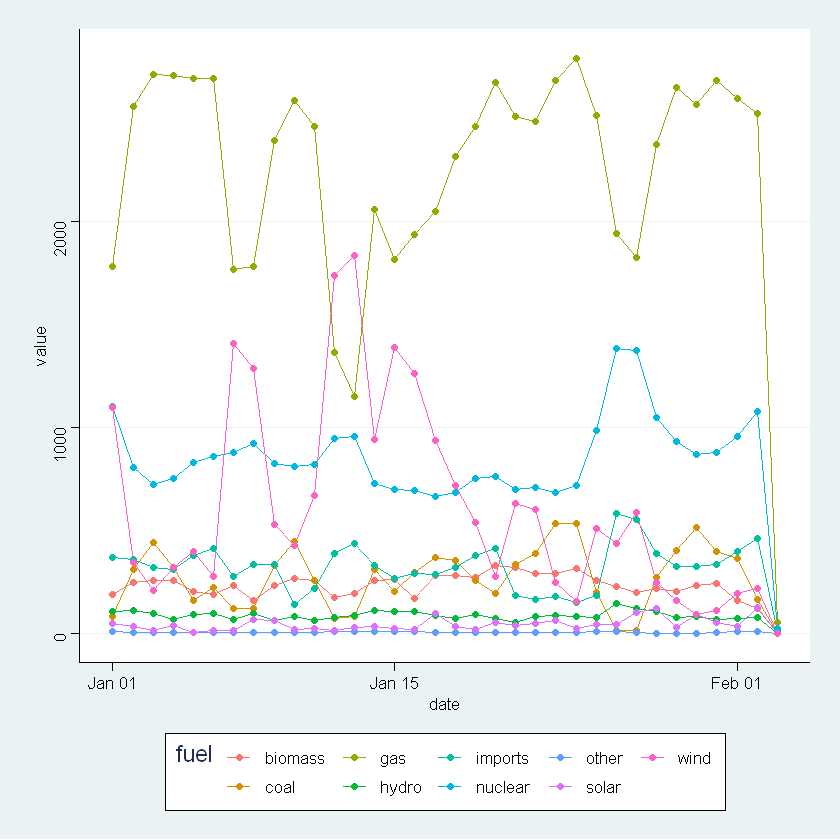

In [4]:
# plot line chart
df_long <- data_generation %>%
  pivot_longer(cols = -date, names_to = "fuel", values_to = "value")

generation_line <- ggplot(df_long, aes(x = date, y = value,color = fuel)) + geom_line() + geom_point() + theme_stata()
generation_line

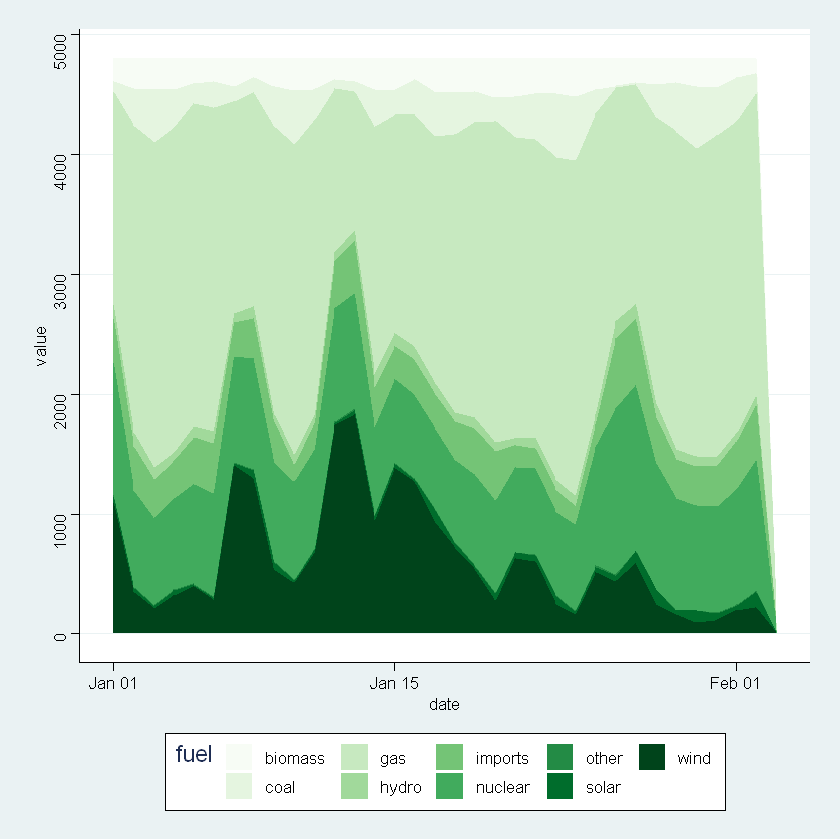

In [5]:
# plot stack chart
df_long <- data_generation %>%
  pivot_longer(cols = -date, names_to = "fuel", values_to = "value")

generation_stack <- ggplot(df_long, aes(x = date, y = value,fill = fuel)) + 
    geom_area() + 
    theme_stata() + 
    scale_fill_brewer(palette="Greens")
generation_stack

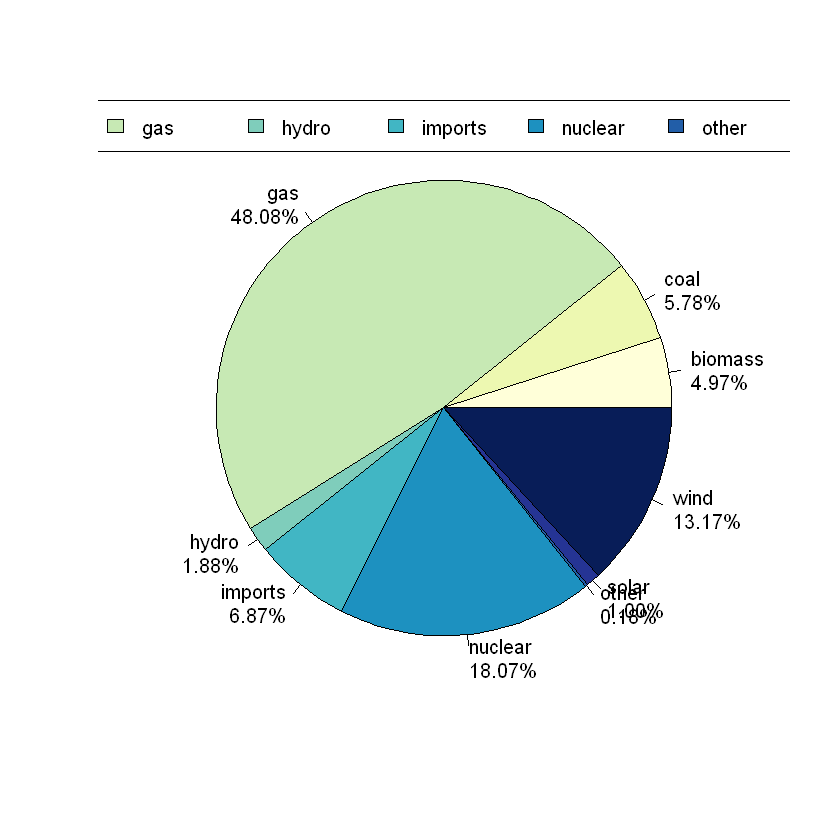

In [19]:
# plot pie chart
df_colSum <- colSums(data_generation[, -1], na.rm = TRUE)
df_colSum <- as.data.frame(t(df_colSum))
df_colSum_long <- pivot_longer(df_colSum, everything(), names_to = "Fuel", values_to = "Sum")
df_colSum_long <- df_colSum_long %>%
  mutate(Percentage = Sum / sum(Sum))

brewer_palette <- "YlGnBu"
palette_function <- brewer_pal(palette = brewer_palette)(length(df_colSum_long$Fuel))
percentage <- sprintf("%s\n%.2f%%", df_colSum_long$Fuel, df_colSum_long$Percentage * 100)
pie(df_colSum_long$Percentage, labels = percentage, col = palette_function)
legend("top",legend = df_colSum_long$Fuel, fill = palette_function, horiz = TRUE)